# 10장 텍스트 마이닝
# 학습목표
> ## 10-1 대통령 연설문 텍스트 마이닝
> ## 10-2 기사 댓글 텍스트 마이닝




## 10-1 대통령 연설문 텍스트 마이닝

1. 텍스트 마이닝(text mining) : 문자로 된 데이터로 부터 가치있는 정보를 얻어내는 기법
- 형태소 분석(morphology analysis) : 텍스트 마이닝의 첫 번째 작업으로, 문자를 구성하는 어절의 품사를 파악
- 형태소 분석을 통해 어절의 품사를 파악한 다음 명사, 동사, 형용사 등의 의미를 지닌 품사를 추출하여 얼마나 많이 사용되었는지 확인
- 텍스트 마이닝을 이용하여 SNS나 웹사이트에 올라온 글을 분석할 수 있음

### Lab 1 : KoNLPy 패키지(한글 텍스트 형태소 분석) 설치하기 - 실습용 PC에는 설치되어 있음

1. 자바 설치 - 자바가 먼저 설치 되어 있어야 함

2. KoNLPy 의존성 패키지 설치하기
- 의존성 패키지 : 다른 패키지의 기능을 이용하는 경우, 다른 패키지를 먼저 설치해야 작동
- pip install jpype1 설치

3. KoNLPy 설치 하기
- pip install konlpy
- KoNLPy(“코엔엘파이”라고 읽습니다)는 한국어 정보처리를 위한 파이썬 패키지
- https://konlpy.org/ko/latest/


4. NLP란 무엇인가요?
- NLP (Natural Language Processing, 자연어처리)는 텍스트에서 의미있는 정보를 분석, 추출하고 이해하는 일련의 기술집합입니다.
- 품사 태깅 은 형태소의 뜻과 문맥을 고려하여 그것에 마크업을 하는 일
> 가방에 들어가신다 -> 가방/NNG + 에/JKM + 들어가/VV + 시/EPH + ㄴ다/EFN
- KoNLPy를 설치하면 다음의 4개 형태소 분석기를 사용 가능 :Hannanum(한나눔),  Kkma(꼬꼬마), Komoran, OKT
     - Hannanum(한나눔) : 정제된 텍스트에 사용하는 형태소 분석기, java 로 구현
                     (http://semanticweb.kaist.ac.kr/hannanum/)
     - Kkma(꼬꼬마) : 띄어쓰기 오류에 덜 민감하여 댓글 분석에 많이 이용하는 형태소 분석기, java 로 구현
                         (http://kkma.snu.ac.kr/)
    - Komoran : https://www.shineware.co.kr/products/komoran/
    - OKT(Open Korean Text):  Twitter에서 만든 오픈소스 한국어 처리기인 Twitter Korean Text를 계승받아 만든 형태소 분석기
    https://github.com/twitter/twitter-korean-text  ->  http://openkoreantext.org 
- 형태소 : 
     - 의미를 가지는 요소로서, 더 이상 쪼갤 수 없는 가장 작은 말의 단위
     - 문법적·관계적인 뜻만을 나타내는 단어 또는 단어의 부분
- 설치하기 
    - jpype1 - 파이썬에서 java 를 호출할수 있도록 한다.
    - konlpy - 파이썬에서 java로 만들어진 형태소 분석기를 연결해 주는 역할을 함

In [187]:
pip install jpype1

Note: you may need to restart the kernel to use updated packages.


In [191]:
pip install konlpy

Note: you may need to restart the kernel to use updated packages.


## Lab 2 : 가장 많이 사용된 단어 알아보기
- 문재인 대통령 대선 출마 선언문을 사용한 텍스트 마이닝
- 윤석열 대통령 대선 출마 선언문을 사용한 텍스트 마이닝
- 문법 오류가 없는 정제된 문장으로 전처리 작업이 많지 않은 텍스트

1. 연설문 불러오기

In [224]:
president_speech = open('speech_moon.txt', encoding = 'UTF-8').read()
#president_speech = open('speech_yoon.txt', encoding = 'UTF-8').read()
president_speech = re.sub('[^가-힣]', ' ', president_speech)
president_speech

'정권교체 하겠습니다    정치교체 하겠습니다    시대교체 하겠습니다        불비불명       이라는 고사가 있습니다  남쪽 언덕 나뭇가지에 앉아   년 동안 날지도 울지도 않는 새  그러나 그 새는 한번 날면 하늘 끝까지 날고  한번 울면 천지를 뒤흔듭니다   그 동안 정치와 거리를 둬 왔습니다  그러나 암울한 시대가 저를 정치로 불러냈습니다  더 이상 남쪽 나뭇가지에 머무를 수 없었습니다  이제 저는 국민과 함께 높이 날고 크게 울겠습니다  오늘 저는 제  대 대통령선거 출마를 국민 앞에 엄숙히 선언합니다     우리나라 대통령 이 되겠습니다    존경하는 국민 여러분       저는 대통령이 되겠습니다  우리나라 대통령이 되겠습니다  소수 특권층의 나라가 아니라 보통사람들이 주인인  우리나라   네 편 내 편 편가르지 않고 함께 가는 우리나라   우리 라는 말이 조금도 부끄럽지 않은  진정한  우리나라 의 대통령이 되겠습니다   지금까지 우리 보통사람들은 날지도 울지도 못하는 새였습니다  나라의 주인으로 행세하지 못했고  주인으로 대접받지 못했습니다  나서서 말도 하지 못했습니다  이제 몸을 일으켜 날아야 합니다  당당하게 말하고 정치에 참여해야 합니다   제가 추구하는  우리나라 는 정치인에게 맡겨놓는 나라가 아니라 시민이 직접 정치와 정책과정에 참여하는 나라입니다  저는 시민과 동행하는 정치를 하고 싶습니다  제가 추구하는  우리나라 는 특권과 불평등의 나라가 아니라  보통사람들이 함께 기회를 가지는 공평하고 정의로운 나라입니다   이제 권력과 돈을 가진 집단이 나라를 그들 마음대로 움직이던 시대는 끝났습니다  힘없는 사람들에게 끝없이 희생을 강요하던 낡은 경제  낡은 정치  낡은 권력도 모두 끝났습니다  오늘 저 문재인은 우리나라를 우리 모두의 나라로 선언합니다   국민이 모두 아픕니다   제가 높이 날고 크게 울겠다고 결심한 이유는 보통사람들의 삶이 너무 고달프고  우리가 처한 현실이 너무도 엄중하기 때문입니다  근본적인 혁신  거대한 전

2. 불필요한 문자 제거하기
- 특수문자, 한자 등, 한글이 아닌 문자를 제거
- re.sub()를 활용하여 한글이 아닌 모든 문자를 공백으로 변경
 
- re.sub(pattern, replace, text)
    - text 중 pattern에 해당하는 부분을 replace로 대체한다.
    - president_speech = re.sub('[^가-힣]', ' ', president_speech)
    
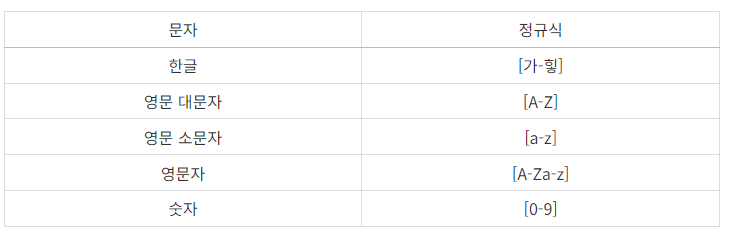    
 
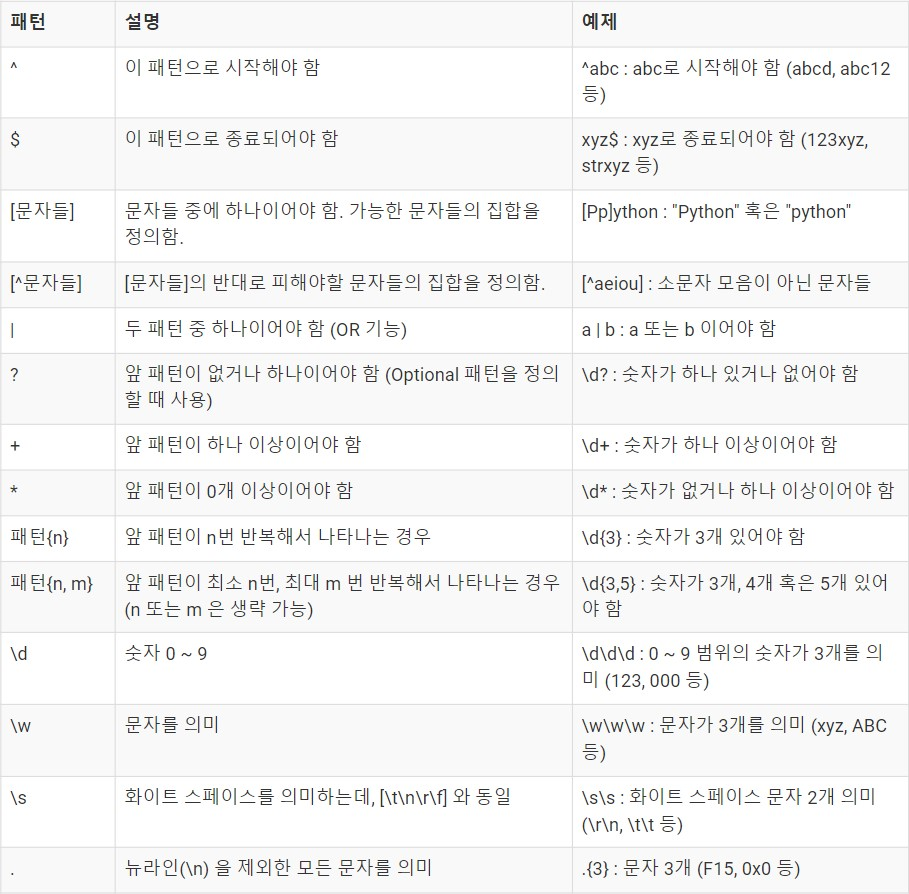

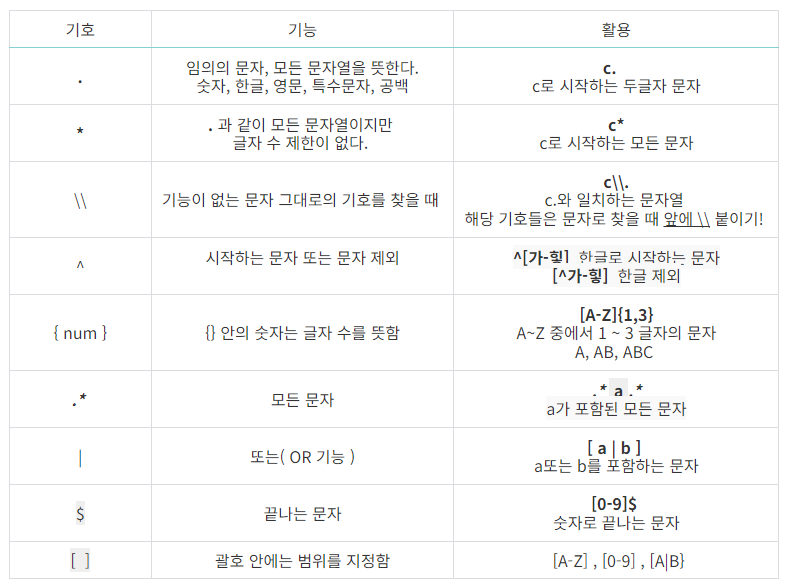



In [226]:
# 불필요한 문자 제거
import re

In [228]:
president_speech = re.sub('[^가-힣]', ' ', president_speech)  # 두번째 파라미터가 공백 문자임에 주의
#president_speech

3. 명사 추출하기
- 문장에서 명사만을 추출하여 분석해 보자

In [230]:
# hannanum 만들기
import konlpy
hannanum = konlpy.tag.Hannanum()

In [232]:
# 형태소와 종류까지 추출하기 (N 명사, J 조사 등)
hannanum.pos("대한민국의 영토는 한반도와 그 부속도서로 한다")

[('대한민국', 'N'),
 ('의', 'J'),
 ('영토', 'N'),
 ('는', 'J'),
 ('한반도', 'N'),
 ('와', 'J'),
 ('그', 'M'),
 ('부속도서', 'N'),
 ('로', 'J'),
 ('하', 'P'),
 ('ㄴ다', 'E')]

In [208]:
# 형태소 종류 알파벳의 의미 확인
hannanum.tagset

{'E': '어미',
 'EC': '연결 어미',
 'EF': '종결 어미',
 'EP': '선어말어미',
 'ET': '전성 어미',
 'F': '외국어',
 'I': '독립언',
 'II': '감탄사',
 'J': '관계언',
 'JC': '격조사',
 'JP': '서술격 조사',
 'JX': '보조사',
 'M': '수식언',
 'MA': '부사',
 'MM': '관형사',
 'N': '체언',
 'NB': '의존명사',
 'NC': '보통명사',
 'NN': '수사',
 'NP': '대명사',
 'NQ': '고유명사',
 'P': '용언',
 'PA': '형용사',
 'PV': '동사',
 'PX': '보조 용언',
 'S': '기호',
 'X': '접사',
 'XP': '접두사',
 'XS': '접미사'}

In [234]:
# 명사 추출하기
hannanum.nouns("대한민국의 영토는 한반도와 그 부속도서로 한다")

['대한민국', '영토', '한반도', '부속도서']

In [236]:
# 형태소 단위로 추출하기
hannanum.morphs("대한민국의 영토는 한반도와 그 부속도서로 한다")

['대한민국', '의', '영토', '는', '한반도', '와', '그', '부속도서', '로', '하', 'ㄴ다']

In [238]:
# 연설문에서 명사 추출하기
nouns = hannanum.nouns(president_speech)
nouns[:19]

['정권교체',
 '정치교체',
 '시대교체',
 '불비불명',
 '고사',
 '남쪽',
 '언덕',
 '나뭇가지',
 '년',
 '동안',
 '새',
 '한번',
 '하늘',
 '끝',
 '한번',
 '천지',
 '동안',
 '정치',
 '거리']

4. 단어 빈도표 만들기
> - list 형태를 dataframe으로 변경
> - 자주 나온 단어를 그래프로 확인하기 위함

In [304]:
# 데이터 프레임으로 변환
import pandas as pd
import seaborn as sns
#nouns = hannanum.nouns(president_speech)
# pd.DataFrame({ 컬럼명: [1,2,3,4,5] })
df_word = pd.DataFrame( {'word' : nouns})
#df_word
#1. 한글자짜리 단어 삭제 , 그, 이,  ->  삭제
#2. 같은 단어가 몇번 나왔는가? 
df_word['word_n'] =df_word['word'].str.len()
df_word.head()
df_word1 = df_word.query('word_n >= 2')
df_word1
df_word2 = df_word1.groupby('word', as_index=False)\
            .agg( 출현횟수 = ( 'word' , 'count' ))\
                .sort_values('출현횟수', ascending = False)
df_word2.head()
#sns.barplot(data = df_word2, x = 'word'	, y ='출현횟수')

,word,출현횟수
153,나라,19
462,일자리,19
116,국민,18
422,우리,17
198,대통령,12


In [294]:
#pip install wordcloud

In [324]:
font1 = 'DoHyeon-Regular.ttf'

In [332]:
df_word2

,word,출현횟수
153,나라,19
462,일자리,19
116,국민,18
422,우리,17
198,대통령,12
...,...,...
278,북핵문제,1
279,분단,1
281,분야,1
283,분쟁,1


In [334]:
# dataframe-> dictionary 
dic_word2 = df_word2.set_index('word').to_dict()['출현횟수']
#dic_word2

In [336]:
from wordcloud import WordCloud

In [391]:
import PIL
import numpy as np
icon = PIL.Image.open('car.jpg')
#icon.show()
img = np.array(icon)
#img

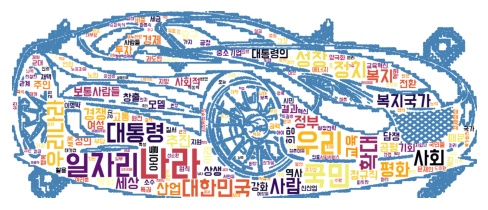

In [395]:
# wc 만들기
wc = WordCloud( random_state = 100,        # 난수 고정, 항상 같은 모양으로 생성
                font_path = font1,           # 폰트 설정
                width =400,                # 가로 크기
                height = 400,               # 세로 크기
                background_color = 'white', # 배경색
                colormap='inferno',
                mask = img,
               contour_color='steelblue',
               contour_width=5
              ) 
# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word2)
# 워드 클라우드 출력하기
# 자주 사용한 단어는 크게 표시됨
plt.figure(figsize = (5, 5))            # 액자 사이즈
plt.axis('off')                         # 테두리 선 없애기
plt.imshow(img_wordcloud)

In [26]:
# 단어 중 2글자 이상의 단어만 남기기 , 한글자 단어는 의미가 없는 경우가 많음. 예) 그, 저, 이 등
# 단어를 오름차순 정렬
df_word = df_word.query('word_n >= 2')
df_word.sort_values('word')

,word,word_n
752,가동,2
1164,가사,2
275,가슴,2
1356,가슴,2
1179,가족,2
...,...,...
195,희망,2
1015,희망,2
1074,희망,2
1128,희생,2


In [27]:
# 동일 단어는 하나로 통합, 빈도수를 구한다.
df_word = df_word.groupby('word', as_index=False) \
                .agg(n = ('word', 'count')) \
                .sort_values('n', ascending=False)
df_word

,word,n
153,나라,19
462,일자리,19
116,국민,18
422,우리,17
198,대통령,12
...,...,...
278,북핵문제,1
279,분단,1
281,분야,1
283,분쟁,1


5. 단어 빈도 그래프 만들기

In [29]:
# 단어 빈도 상위 20개 추출
top20 = df_word.head(20)
top20

,word,n
153,나라,19
462,일자리,19
116,국민,18
422,우리,17
198,대통령,12
202,대한민국,11
693,확대,11
525,정치,10
423,우리나라,10
304,사회,9


<Axes: xlabel='n', ylabel='word'>

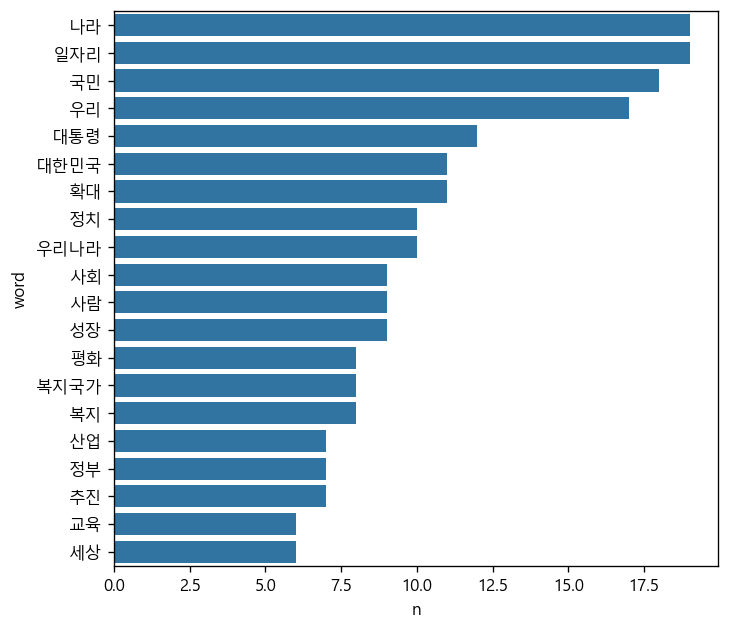

In [30]:
# 막대 그래프 그리기
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update( {'font.family' : 'malgun Gothic',  # 한글 폰트
                      'figure.dpi' : '120',             # 해상도
                      'figure.figsize' : [6.5, 6]})     # 가로, 세로 크기

sns.barplot(data=top20, y='word', x='n')

- '일자리', '복지국가' 등의 단어 구성으로 일자리 문제를 해결하고 복지국가를 지향하겠다는 의사를 표현했다는 것을 알 수 있음

In [32]:
# 위의 것을 한번에 진행하면,

# 연설문에서 명사 추출하기
# 글자수 column을 추가한다. -> assign
# 단어의 글자수가 2 이상이면서, ->query 
# 가장 많이 빈번하게 나온 단어를-> groupby를 'word'로 한다. 그리고 숫자를 세어본다.
# 내림차순으로 정렬 -> sort_values
# top10 찍을것 ->head(10)

nouns2 = hannanum.nouns(president_speech)
df = pd.DataFrame({'word': nouns2})
df1=df.assign(word_count = df['word'].str.len())\
    .query("word_count >=2")\
        .groupby('word', as_index=False )\
            .agg(횟수 = ('word', 'count'))\
                .sort_values('횟수', ascending=False)\
                    .head(10)
df1

,word,횟수
153,나라,19
462,일자리,19
116,국민,18
422,우리,17
198,대통령,12
202,대한민국,11
693,확대,11
525,정치,10
423,우리나라,10
304,사회,9


## Lab 3 : 워드 클라우드 만들기
- 워드 클라우드(word cloud)는 단어의 빈도를 구름 모양으로 표현한 그래프
- 어떤 단어가 얼마나 사용됬는지 파악하기 쉽다.

1. wordcloud 패키지 설치

In [35]:
!pip install wordcloud

2. 한글 폰트 설정하기
- 워드 클라우드에 한글을 표현하려면 한글 폰트를 사용하도록 설정해야 함
- 배달의 민족 도현체 폰트 설치

In [37]:
font = 'DoHyeon-Regular.ttf'

3. 단어와 빈도를 담은 딕셔너리 만들기
- 워드 클라우드는 딕셔너리 자료구조를 활용하여 만듬
- df_word는 데이터 프레임으로 딕셔너리로 변환하여 사용

In [39]:
df_word.head()

,word,n
153,나라,19
462,일자리,19
116,국민,18
422,우리,17
198,대통령,12


In [40]:
#DataFrame을 dictionary로 변경 
dic_word = df_word.set_index('word').to_dict()['n']
dic_word

{'나라': 19,
 '일자리': 19,
 '국민': 18,
 '우리': 17,
 '대통령': 12,
 '대한민국': 11,
 '확대': 11,
 '정치': 10,
 '우리나라': 10,
 '사회': 9,
 '사람': 9,
 '성장': 9,
 '평화': 8,
 '복지국가': 8,
 '복지': 8,
 '산업': 7,
 '정부': 7,
 '추진': 7,
 '교육': 6,
 '세상': 6,
 '경쟁': 6,
 '보통사람들': 5,
 '공평': 5,
 '경제': 5,
 '대통령의': 5,
 '상생': 5,
 '정규직': 5,
 '정의': 4,
 '결과': 4,
 '사회적': 4,
 '투자': 4,
 '주인': 4,
 '전환': 4,
 '때문': 4,
 '모델': 4,
 '요구': 4,
 '희망': 4,
 '창출': 4,
 '역사': 4,
 '기회': 4,
 '여성': 4,
 '담쟁': 4,
 '강화': 4,
 '아래': 4,
 '고통': 4,
 '약자': 4,
 '아이들': 4,
 '중소기업': 4,
 '공정': 3,
 '문재인': 3,
 '특권': 3,
 '국가': 3,
 '사람들': 3,
 '노인': 3,
 '변화': 3,
 '비중': 3,
 '교육혁신': 3,
 '관계': 3,
 '질서': 3,
 '군대': 3,
 '지원': 3,
 '과도한': 3,
 '권력': 3,
 '부담': 3,
 '그것': 3,
 '지방': 3,
 '국민들': 3,
 '채택': 3,
 '소수': 3,
 '세계': 3,
 '신산업': 3,
 '시민': 3,
 '개선': 3,
 '혁신': 3,
 '혁명': 3,
 '양극화': 3,
 '원칙': 3,
 '활용': 3,
 '행복': 3,
 '원전': 3,
 '에너지': 3,
 '경제성장': 3,
 '세금': 3,
 '이명박': 3,
 '성장전략': 3,
 '가치': 3,
 '가지': 3,
 '여러분': 3,
 '강자': 3,
 '진정한': 2,
 '노동자들': 2,
 '마음속': 2,
 '노력': 2,
 '만큼': 2,
 '육성': 2,
 '모두

4. 워드 클라우드 만들기

In [42]:
from wordcloud import WordCloud

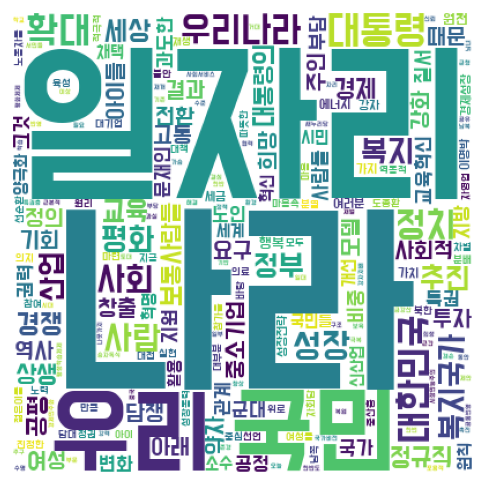

In [43]:
# wc 만들기
wc = WordCloud(random_state = 710,         # 난수 고정, 항상 같은 모양으로 생성
                font_path = font,           # 폰트 설정
                width = 400,                # 가로 크기
                height = 400,               # 세로 크기
                background_color = 'white') # 배경색

# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)

# 워드 클라우드 출력하기
# 자주 사용한 단어는 크게 표시됨
plt.figure(figsize = (5, 5))            # 액자 사이즈
plt.axis('off')                         # 테두리 선 없애기
plt.imshow(img_wordcloud)

## Lab 4 : 워드 클라우드 모양 바꾸기
- WordCloud()의 mask를 이용하여 워드 클라우드(word cloud) 모양을 바꿀 수 있음


1. mask 만들기
- PIL(Python Imaging Library) : 이미지 분석 및 처리를 쉽게할 수 있는 라이브러리
- 픽셀 단위 조작
- 마스킹 및 투명도 제어
- 흐림, 윤곽 보정, 윤곽 검출 등 이미지 필터
- 선명도, 밝기, 명암 보장 등 화상 조정
- 이미지에 텍스트 추가하기

In [46]:
import PIL

In [47]:
# 구름 이미지 불러오기
# 구름 모양의 이미지 경계가 뚜렸한 png 파일
# 마스크가 될 이미지 파일 불러오기

#icon = PIL.Image.open('cloud.png')  
icon = PIL.Image.open('alice.png')   

In [48]:
print(f'이미지 파일 이름 : {icon.filename}')
print(f'이미지 파일 형식 : {icon.format}')
print(f'이미지 파일 크기 : {icon.size}')
print(f'이미지 색상 모드 : {icon.mode}')
print(f'이미지 가로 크기 : {icon.width}')
print(f'이미지 세로 크기 : {icon.height}')

이미지 파일 이름 : C:\Users\213\daworkspace\reference\13. 10장 텍스트마이닝\alice.png
이미지 파일 형식 : PNG
이미지 파일 크기 : (640, 480)
이미지 색상 모드 : RGBA
이미지 가로 크기 : 640
이미지 세로 크기 : 480


In [49]:
icon.show()

In [50]:
# mask 파일 생성
import numpy as np
img = np.array(icon)
img

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

2. 워드 클라우드 만들기

In [52]:
# wc  만들기
wc = WordCloud(random_state=1234,
              font_path = font,
              width = 400,
              height = 400,
              contour_width=5,                  # 테두리 굵기
              contour_color='steelblue',        # 테두리 색
              background_color = 'white',
              mask = img)                      # 배경으로 사용할 이미지

type(wc) 

wordcloud.wordcloud.WordCloud

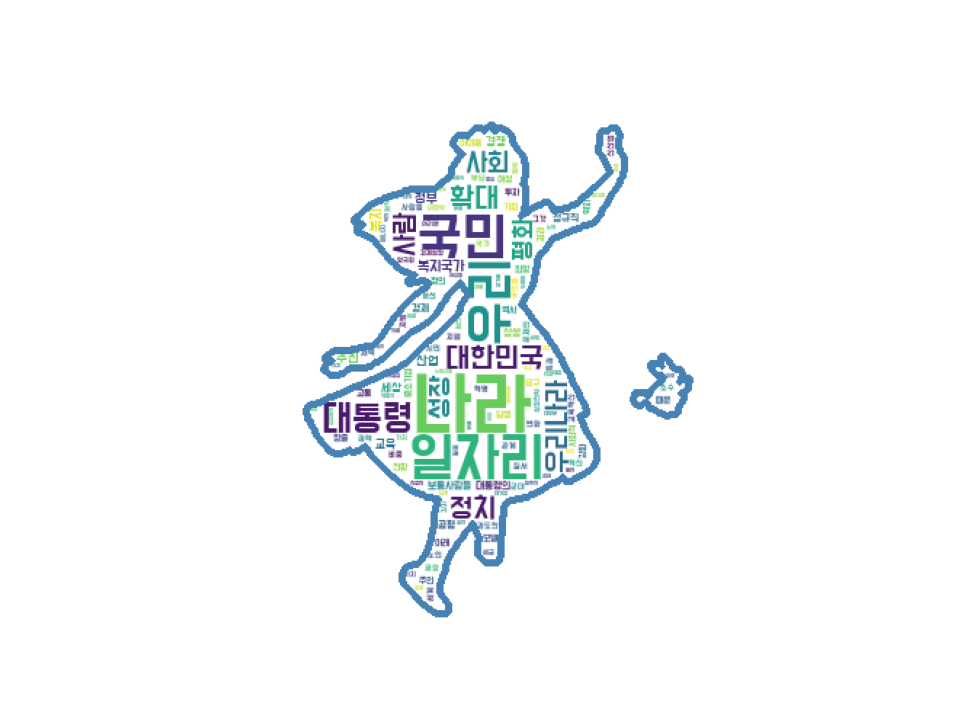

In [53]:
# 구름 이미지로 mask 만들기# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)

# 워드 클라우드 출력하기
plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(img_wordcloud)

## Lab 5 : 워드 클라우드 색깔 바꾸기
- inferno 컬러맵 적용 
- 칼라맵의 종류 확인   https://bit.ly/easypy_104
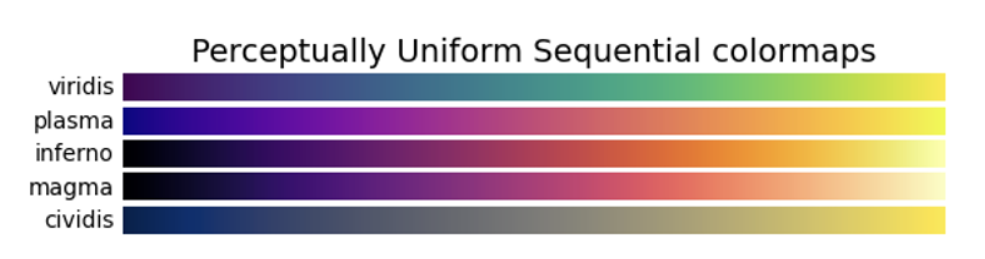

In [55]:
# wc  만들기
wc = WordCloud(random_state=1234,
              font_path = font,
              width = 400,
              height = 400,
              background_color = 'white',
              mask = img,
               contour_width=1,
               contour_color='yellow',
              colormap = 'inferno')      # 컬러맵 설정

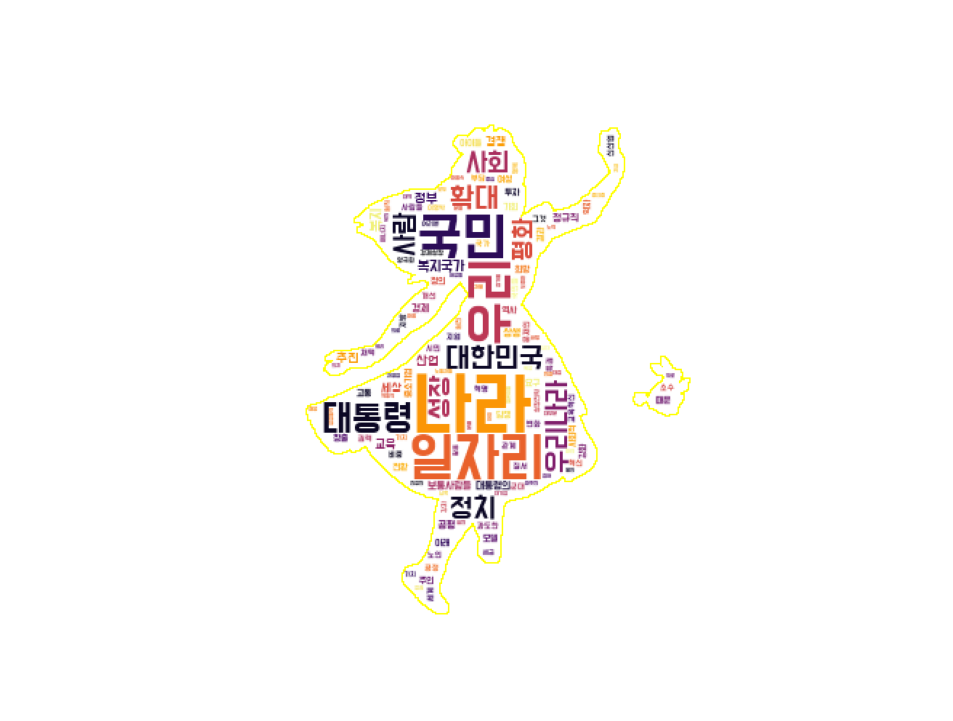

In [56]:
# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)

# 워드 클라우드 출력하기
plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(img_wordcloud)

## 10-2 기사 댓글 텍스트 마이닝
- 2020년 9월 21일 방탄소년단이 '빌보드 핫 100 차트' 1위에 오른 소식을 다룬 네이버 뉴스 댓글 분석

## Lab 6 : 가장 많이 사용된 단어 알아보기

1. 기사 댓글 불러오기

In [60]:
# 데이터 불러오기
# naver 뉴스 댓글 파일
import pandas as pd
df = pd.read_csv('news_comment_BTS.csv', encoding='UTF-8')

In [61]:
df.head()

,reg_time,reply,press,title,url
0,2020-09-01 22:58:09,국보소년단<U+0001F49C>,한국경제,"[속보]BTS '다이너마이트', 한국 가수 최초로 빌보드 싱글 1위",https://news.naver.com/main/read.nhn?mode=LSD&...
1,2020-09-01 09:56:46,아줌마가 들어도 좋더라,한국경제,"[속보]BTS '다이너마이트', 한국 가수 최초로 빌보드 싱글 1위",https://news.naver.com/main/read.nhn?mode=LSD&...
2,2020-09-01 09:08:06,팩트체크\n\n현재 빌보드 HOT 100\n\n1위 방탄소년단[BTS]\n2위 C...,한국경제,"[속보]BTS '다이너마이트', 한국 가수 최초로 빌보드 싱글 1위",https://news.naver.com/main/read.nhn?mode=LSD&...
3,2020-09-01 08:52:32,방탄소년단이 한국사람이라 너무 자랑스러워요 ㅠㅠ 우리오래오래 함께하자!,한국경제,"[속보]BTS '다이너마이트', 한국 가수 최초로 빌보드 싱글 1위",https://news.naver.com/main/read.nhn?mode=LSD&...
4,2020-09-01 08:36:33,"대단한 BTS, 월드 클래스는 다르네^^ 좋은 소식!! 응원해요",한국경제,"[속보]BTS '다이너마이트', 한국 가수 최초로 빌보드 싱글 1위",https://news.naver.com/main/read.nhn?mode=LSD&...


In [62]:
# 데이터 살펴보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reg_time  1200 non-null   object
 1   reply     1200 non-null   object
 2   press     1200 non-null   object
 3   title     1200 non-null   object
 4   url       1200 non-null   object
dtypes: object(5)
memory usage: 47.0+ KB


2. 불필요한 문자 제거하기
- 댓글(reply)에서 불필요한 문자 제거

In [64]:
# 불필요한 문자 제거하기
df['reply'] = df['reply'].str.replace('[^가-힣]', ' ', regex=True)
df['reply'].head()

0                                    국보소년단            
1                                         아줌마가 들어도 좋더라
2    팩트체크  현재 빌보드           위  방탄소년단       위       ...
3              방탄소년단이 한국사람이라 너무 자랑스러워요    우리오래오래 함께하자 
4                  대단한      월드 클래스는 다르네   좋은 소식   응원해요
Name: reply, dtype: object

3. 명사 추출하기
- 꼬꼬마(Kkma) 형태 분석기 사용
- 꼬꼬마 형태소 분석기는 띄어쓰기 오류가 있는 문장에서도 형태소를 잘 출력
- 댓글 처럼 정제되지 않은 텍스트 분석시 적합

In [66]:
# Kkma 만들기
import konlpy
kkma = konlpy.tag.Kkma()

In [67]:
# 꼬꼬마 형태소 분석기로 명사 추출
nouns = df['reply'].apply(kkma.nouns)
nouns

0                                        [국보, 국보소년단, 소년단]
1                                                   [아줌마]
2                   [팩트, 팩트체크, 체크, 보드, 위, 방탄, 방탄소년단, 소년단]
3              [방탄, 방탄소년단, 소년단, 한국, 한국사람, 사람, 자랑, 우리, 하자]
4                                       [월드, 클래스, 소식, 응원]
                              ...                        
1195                                                   []
1196                                      [우리, 탄, 자랑, 사랑]
1197                                              [애, 군대]
1198                                     [군, 군면제급, 면제, 급]
1199    [자랑, 축하, 김, 김남, 남, 김석진, 민, 민윤기, 윤기, 정, 정호석, 호석...
Name: reply, Length: 1200, dtype: object

In [68]:
type(nouns)

pandas.core.series.Series

4. 단어 빈도표 만들기
- 꼬꼬마 형태소 분석기는 행마다 여러 단어가 리스트 자료 구조에 들어감
- df.explode()로 한 행에 한 단어만 들어가도록 함

In [70]:
nouns = nouns.explode()
nouns

0          국보
0       국보소년단
0         소년단
1         아줌마
2          팩트
        ...  
1199      박지민
1199      김태형
1199        전
1199      전정국
1199       정국
Name: reply, Length: 9353, dtype: object

> 두 글자 이상 단어만 남기기

In [72]:
# 데이터 프레임 만들기
type(nouns)

pandas.core.series.Series

In [73]:
df_word = pd.DataFrame({'word' : nouns})
df_word.head()

,word
0,국보
0,국보소년단
0,소년단
1,아줌마
2,팩트


In [74]:
###### 글자 수 추가
df_word['count'] = df_word['word'].str.len()
df_word.head()

,word,count
0,국보,2.0
0,국보소년단,5.0
0,소년단,3.0
1,아줌마,3.0
2,팩트,2.0


In [75]:
# 두 글자 이상 단어만 남기기
df_word = df_word.query('count >= 2')
df_word.head()

,word,count
0,국보,2.0
0,국보소년단,5.0
0,소년단,3.0
1,아줌마,3.0
2,팩트,2.0


In [76]:
# 빈도표 만들기
df_word = df_word.groupby('word', as_index=False) \
                .agg(n = ('word', 'count')) \
                .sort_values('n', ascending=False)
df_word

,word,n
752,방탄,280
1878,축하,236
1556,자랑,205
1032,소년단,144
763,방탄소년단,136
...,...,...
1136,실력있음,1
406,다음주면,1
1134,신화,1
1133,신중,1


5. 단어 빈도 막대 그래프 만들기

In [78]:
# 단어 빈도 상위 20개 추출
top20 = df_word.head(20)
top20

,word,n
752,방탄,280
1878,축하,236
1556,자랑,205
1032,소년단,144
763,방탄소년단,136
813,보드,131
618,면제,125
233,군면제,78
225,군대,77
1364,우리,68


<Axes: xlabel='n', ylabel='word'>

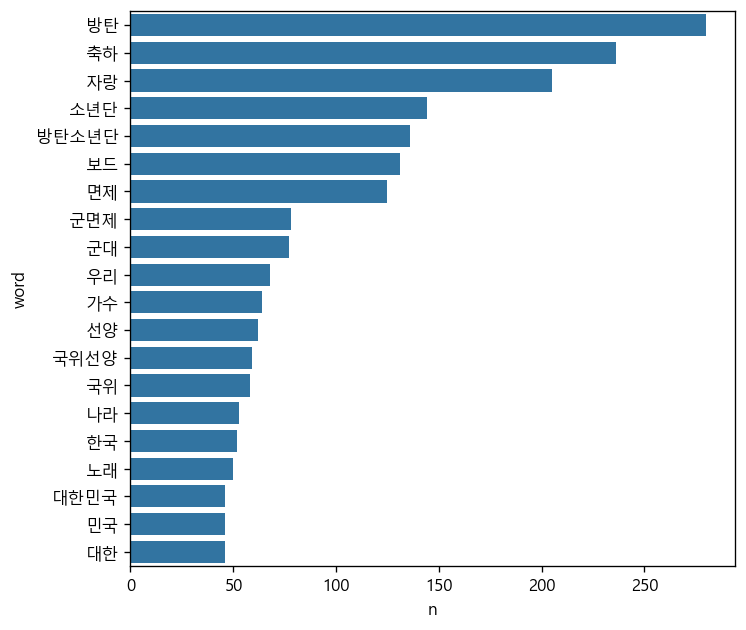

In [79]:
# 가로 세로 크기 결정
plt.rcParams.update({'figure.figsize' : [6.5, 6]})

# 막대 그래프 만들기
sns.barplot(data=top20, y='word', x='n')

- 출력된 그래프를 보면 '방탄', '축하', '자랑', ' 국위선양', '대한민국' 등 단어 빈도 높음
- 칭찬 댓글이 많음을 알 수 있음
- 군대, 연제, 군면제 등 단어도 많아 BTS 병역의무 면제에 대한 댓글도 많음

## Lab 7 : 워드 클라우드 만들기

### 칼라맵의 종류 확인   https://bit.ly/easypy_104

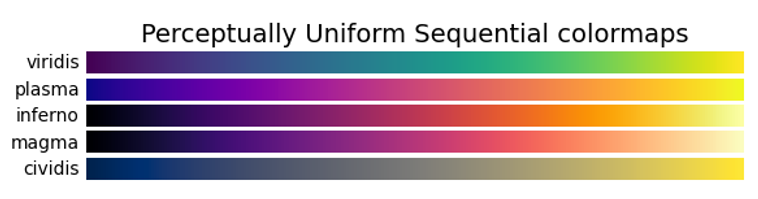

In [83]:
# 데이터 프레임을 딕셔너리로 변환
dic_word = df_word.set_index('word').to_dict()['n']
dic_word

{'방탄': 280,
 '축하': 236,
 '자랑': 205,
 '소년단': 144,
 '방탄소년단': 136,
 '보드': 131,
 '면제': 125,
 '군면제': 78,
 '군대': 77,
 '우리': 68,
 '가수': 64,
 '선양': 62,
 '국위선양': 59,
 '국위': 58,
 '나라': 53,
 '한국': 52,
 '노래': 50,
 '대한민국': 46,
 '민국': 46,
 '대한': 46,
 '진짜': 43,
 '최고': 40,
 '대박': 39,
 '세계': 36,
 '아미': 35,
 '소식': 31,
 '시기': 30,
 '생각': 30,
 '정국': 29,
 '사람': 29,
 '라니': 29,
 '행복': 29,
 '사랑': 28,
 '역사': 28,
 '생일': 27,
 '코로나': 27,
 '차트': 27,
 '핫백': 26,
 '위라니': 24,
 '감사': 24,
 '축하해': 23,
 '우리나라': 23,
 '전세계': 22,
 '그룹': 22,
 '싱글': 22,
 '미국': 22,
 '이것': 22,
 '진심': 22,
 '인정': 22,
 '정도': 22,
 '노력': 21,
 '응원': 20,
 '요즘': 19,
 '음악': 19,
 '활동': 19,
 '고생': 18,
 '최초': 17,
 '아이': 17,
 '너희': 15,
 '국가': 15,
 '올림픽': 15,
 '이제': 15,
 '문화': 15,
 '때문': 15,
 '국민': 15,
 '뉴스': 15,
 '기분': 14,
 '숟가락': 14,
 '기사': 14,
 '멤버': 14,
 '수고': 14,
 '대통령': 14,
 '내가': 14,
 '한국인': 13,
 '아티스트': 13,
 '눈물': 13,
 '이름': 13,
 '시국': 13,
 '마이트': 12,
 '금메달': 12,
 '지금': 12,
 '아시아': 12,
 '댓글': 12,
 '친구': 11,
 '위로': 11,
 '재인': 11,
 '남자': 11,
 '싱글차트': 11,

In [84]:
# wc  만들기
wc = WordCloud(random_state=1234,
              font_path = font,
              width = 400,
              height = 400,
              background_color = 'white',
              mask = img,
              colormap = 'inferno')

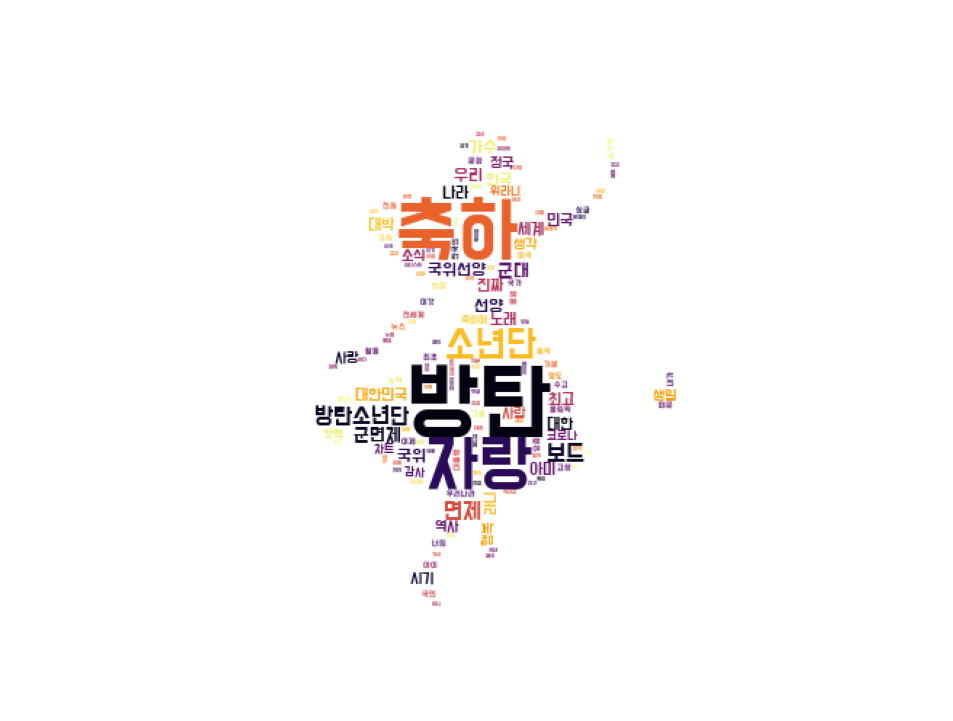

In [85]:
# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)

# 워드 클라우드 출력하기
plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(img_wordcloud)

# 실습1 : 대한민국 헌법 데이터 - 텍스트 마이닝
- 단어 빈도 막대 그래프 만들기
- 워드 클라우드 만들기

In [87]:
import re
import pandas as pd

# KoNLPy에서는 대한민국 헌법 말뭉치인 kolaw와 국회법안 말뭉치인 kobill을 제공
from konlpy.corpus import kolaw

In [88]:
# 말뭉치가 포함하는 파일의 이름은 fields 메서드로 알 수 있음
kolaw.fileids()

['constitution.txt']

In [89]:
# 대한 민국 헌법 읽어 오기
law = kolaw.open('constitution.txt').read()
law[:100]

'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의'

In [90]:
# Okt(Open Korean Text) 만들기
# Twitter에서 만든 한국어 처리기 Twitter-korean-text를 활용하여 만든 한국어 형태소 분석기
from konlpy.tag import Okt 
okt = Okt()

In [91]:
len(law)

18884

In [92]:
# 헌법에서 명사 추출하기
nouns = okt.nouns(law)
len(nouns)

3882

In [93]:
nouns[:30]

['대한민국',
 '헌법',
 '유구',
 '역사',
 '전통',
 '우리',
 '국민',
 '운동',
 '건립',
 '대한민국',
 '임시정부',
 '법',
 '통과',
 '불의',
 '항거',
 '민주',
 '이념',
 '계승',
 '조국',
 '민주',
 '개혁',
 '평화',
 '통일',
 '사명',
 '입',
 '각하',
 '정의',
 '인도',
 '동포',
 '애']

In [94]:
# 1글자로 된 명사는 삭제


In [95]:
# 단어의 빈도표를 상위 20개 단어에 대해 막대 그래프로 그리시오


In [96]:
# wordCloud를 그려보세요


In [97]:
# 다양한 wordCloud mask image를 가져와서 적용해 보세요
# WordCloud mask image 검색


# 실습2. 원하는 주제로 뉴스를 스크랩 해서, 워드클라우드를 만드세요.
> ## 관심있는 회사로 뉴스 스크랩
> ## 관심있는 연예인 기사 스크랩
> ## 그에 맞는 그림으로 변경하기

In [99]:
drug = open('마약롤스로이스.txt', encoding = 'UTF-8').read()
drug

'염모씨가 지난해 12월 27일 서울 서초구 서울중앙지법에서 구속 전 피의자 심문(영장실질심사)을 받은 후 법원을 나서고 있다. [연합뉴스]\n서울 강남에서 롤스로이스 차량으로 피해자를 치고 달아나 숨지게 한 이른바 \'압구정 롤스로이스\' 사건 운전자에게 마약류를 처방하고 수면상태에서 여성 환자 10여명을 성폭행한 혐의를 받는 의사가 구속 기소됐다.\n\n서울중앙지검 마약범죄특별수사팀(김연실 강력범죄수사부장)은 24일 의사 염모씨를 마약류관리법 위반(향정), 의료법 위반, 준강간, 준유사강간, 준강제추행, 성폭력처벌법 위반(카메라 등 이용 촬영) 혐의로 구속기소했다.\n\n검찰에 따르면, 염씨는 지난해 8월 약물에 취해 차를 몰다 행인을 치어 숨지게 한 \'롤스로이스 사건\' 운전자 신모 씨에게 업무 외 목적으로 프로포폴, 미다졸람, 디아제팜, 케타민 등을 혼합해 투여하고 진료기록부를 허위로 기재한 혐의를 받는다.\n\n지난해 10월 초부터 의사 면허가 정지된 상태로 환자에게 프로포폴 등을 투여하는 의료행위를 한 혐의도 있다.\n\n염씨는 수면마취 상태인 여성 10여명을 불법적으로 촬영하고 일부 환자들을 성폭행한 것으로도 조사됐다.\n\n검찰은 "의료인으로서 책임감을 가지고 의존성 및 위험성이 높은 향정신성의약품이 오·남용되지 않도록 엄격히 관리해야 할 의무가 있음에도 의사면허를 악용해 영리 목적으로 프로포폴 등 중독자를 상대로 수면마취제 투여를 일삼아 왔으며, 의사면허 대여로 의사 면허정지 기간임에도 범행을 계속했다"고 지적했다.\n\n그러면서 "의료용 마약류 불법 취급 행위에 대해서는 무관용 원칙을 적용해 엄정하게 대처할 것"이라며 "의료인의 마약류 오남용 처방 등으로 추가 피해가 발생한 사안의 경우 마약 수사 실무협의체를 통해 검·경이 합동해 전방위적인 수사로 그 책임 소재를 철저히 밝힐 것"이라고 강조했다.\n\n씨의 지시를 받은 공범들은 지난해 4월 강남구 대치동 학원가에서 집중력 강화 음료 시음 행사를 빙자해 미성년자 13명에게 마약 음료를 제공하

In [100]:
import re
drug = re.sub('[^가-힣]', ' ', drug)

In [101]:
import konlpy
hannanum1 = konlpy.tag.Hannanum()

In [102]:
drug_list = hannanum1.nouns(drug)
drug_list[:10]

['염모씨', '지난해', '월', '일', '서울', '서초구', '서울중앙지법', '구속', '전', '피의자']

In [103]:
#list 형태를 dataframe으로 변경한다.
import pandas as pd
df_drug = pd.DataFrame({'word': drug_list})
df_drug.head()

,word
0,염모씨
1,지난해
2,월
3,일
4,서울


In [104]:
# 막대 그래프 그리기
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update( {'font.family' : 'malgun Gothic',  # 한글 폰트
                      'figure.dpi' : '120',             # 해상도
                      'figure.figsize' : [6.5, 6]})     # 가로, 세로 크기
 

In [105]:
#글자수 2개 이상으로 변경
import seaborn as sns
df_drug['wordcount']= df_drug['word'].str.len()

result = df_drug.query('wordcount >1')\
        .groupby('word', as_index=False)\
            .agg(갯수 = ('word', 'count'))\
                .sort_values('갯수', ascending = False)
result

,word,갯수
48,마약,9
174,지난해,7
87,선고,6
219,혐의,6
11,검찰,5
...,...,...
86,서초구,1
88,성폭력처벌법,1
90,성형외과,1
91,소재,1


<Axes: xlabel='갯수', ylabel='word'>

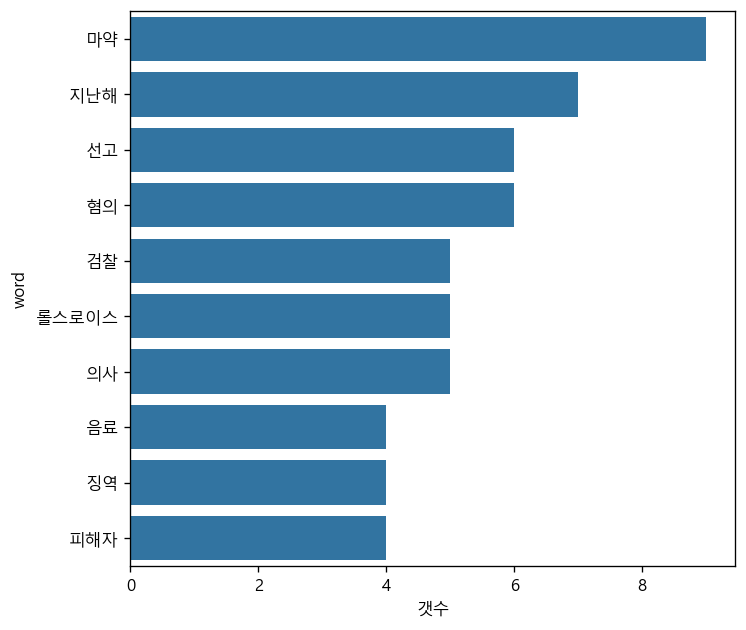

In [106]:
result1 = result.head(10)
sns.barplot(data = result1, y = 'word', x='갯수')

In [107]:
from wordcloud import WordCloud
font = 'DoHyeon-Regular.ttf'
#dataframe을 dictionary로 
dic_word = result.set_index('word').to_dict()['갯수']
dic_word

{'마약': 9,
 '지난해': 7,
 '선고': 6,
 '혐의': 6,
 '검찰': 5,
 '롤스로이스': 5,
 '의사': 5,
 '음료': 4,
 '징역': 4,
 '피해자': 4,
 '상태': 3,
 '서울': 3,
 '구속기소': 3,
 '사건': 3,
 '중국': 3,
 '이씨': 3,
 '발생': 3,
 '여성': 3,
 '체류': 3,
 '운전자': 3,
 '위반': 3,
 '프로포폴': 3,
 '기소': 3,
 '조사': 3,
 '범행': 3,
 '목적': 2,
 '지적': 2,
 '처방': 2,
 '이용': 2,
 '차량': 2,
 '미다졸람': 2,
 '이탈': 2,
 '압구정': 2,
 '향정신성': 2,
 '직후': 2,
 '인근': 2,
 '인정': 2,
 '여명': 2,
 '수사': 2,
 '경찰': 2,
 '재판부': 2,
 '주장': 2,
 '송환': 2,
 '조치': 2,
 '현장': 2,
 '성폭행한': 2,
 '검거': 2,
 '행인': 2,
 '서울중앙지법': 2,
 '행위': 2,
 '염씨': 2,
 '갈취': 2,
 '의료인': 2,
 '강남구': 2,
 '의사면허': 2,
 '환자': 2,
 '투약': 2,
 '의약품': 2,
 '염모씨': 2,
 '촬영': 2,
 '총책': 2,
 '구속': 2,
 '디아제팜': 2,
 '의료용': 1,
 '자녀': 1,
 '적용': 1,
 '적색수배': 1,
 '의료법': 1,
 '적절': 1,
 '협박해': 1,
 '의료행위': 1,
 '의무': 1,
 '인천국제공항': 1,
 '임의': 1,
 '혼합': 1,
 '일부': 1,
 '인터폴': 1,
 '인도': 1,
 '의식불명': 1,
 '의존성': 1,
 '이유': 1,
 '전방위적': 1,
 '이모씨': 1,
 '형사': 1,
 '이상': 1,
 '학원가': 1,
 '주범들': 1,
 '정지': 1,
 '현지': 1,
 '체포': 1,
 '행사': 1,
 '체포영장': 1,
 '최민혜': 1,
 '취급': 1,
 '카메라':

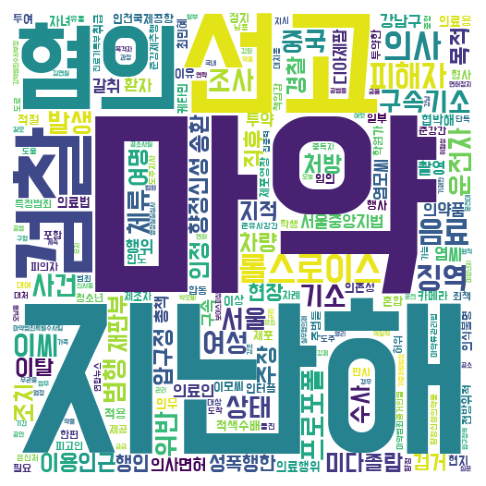

In [108]:
wc = WordCloud(random_state = 1111,
              font_path = font, 
                width = 500,
               height = 500,
               background_color = 'white'
              )
image_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize=(5,5))
plt.axis('off')
plt.imshow(image_wordcloud)

In [109]:
import PIL
icon = PIL.Image.open('car.jpg')
icon.show()

In [110]:
import numpy as np
img = np.array(icon)
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

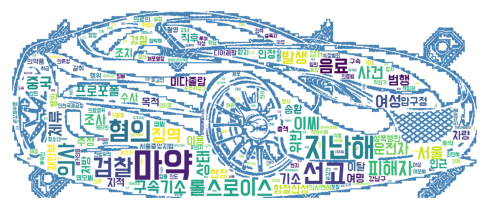

In [111]:
wc = WordCloud(random_state = 1111,
              font_path = font, 
                width = 500,
               height = 500,
               background_color = 'white',
               contour_color='steelblue',
               contour_width=3,
               mask = img
              )
image_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize=(5,5))
plt.axis('off')
plt.imshow(image_wordcloud)